## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.2, 0.25, 0.3, 0.35]
NUM_NEURONS = [[512, 256, 128],[512, 256, 128, 64, 32]]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropexp in Dropout_EXP:
    for num_neu in NUM_NEURONS:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with num_neurons = %s" % str(num_neu))
        print("Experiment with Dropout rate = %.6f" % (dropexp))
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neu, drp_ratio=dropexp)
        model.summary()
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Dropout rate-%s-num_neurons-%s" % (str(dropexp),str(num_neu))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with num_neurons = [512, 256, 128]
Experiment with Dropout rate = 0.200000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_

50000/50000 [==============================] - 19s 383us/step - loss: 1.3973 - acc: 0.4983 - val_loss: 1.3933 - val_acc: 0.4997
Epoch 43/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.3965 - acc: 0.4984 - val_loss: 1.3824 - val_acc: 0.5124
Epoch 44/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.3994 - acc: 0.4969 - val_loss: 1.4112 - val_acc: 0.4976
Epoch 45/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.3999 - acc: 0.4977 - val_loss: 1.3935 - val_acc: 0.5065
Epoch 46/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.3930 - acc: 0.4990 - val_loss: 1.3996 - val_acc: 0.5035
Epoch 47/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.3821 - acc: 0.5007 - val_loss: 1.3847 - val_acc: 0.5035
Epoch 48/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.3846 - acc: 0.5038 - val_loss: 1.4025 - val_acc: 0.5017
Epoch 49/50
50000/50000 [=======

50000/50000 [==============================] - 18s 361us/step - loss: 1.5949 - acc: 0.4330 - val_loss: 1.5058 - val_acc: 0.4672
Epoch 36/50
50000/50000 [==============================] - 18s 361us/step - loss: 1.5915 - acc: 0.4314 - val_loss: 1.5162 - val_acc: 0.4648
Epoch 37/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.5864 - acc: 0.4327 - val_loss: 1.5173 - val_acc: 0.4585
Epoch 38/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.5819 - acc: 0.4343 - val_loss: 1.5090 - val_acc: 0.4645
Epoch 39/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.5791 - acc: 0.4374 - val_loss: 1.5591 - val_acc: 0.4438
Epoch 40/50
50000/50000 [==============================] - 19s 380us/step - loss: 1.5745 - acc: 0.4384 - val_loss: 1.5068 - val_acc: 0.4683
Epoch 41/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.5701 - acc: 0.4413 - val_loss: 1.4893 - val_acc: 0.4757
Epoch 42/50
50000/50000 [=======

50000/50000 [==============================] - 18s 364us/step - loss: 1.5243 - acc: 0.4516 - val_loss: 1.4814 - val_acc: 0.4730
Epoch 33/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.5247 - acc: 0.4533 - val_loss: 1.4894 - val_acc: 0.4701
Epoch 34/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.5249 - acc: 0.4529 - val_loss: 1.4660 - val_acc: 0.4812
Epoch 35/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.5289 - acc: 0.4527 - val_loss: 1.4800 - val_acc: 0.4777
Epoch 36/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.5188 - acc: 0.4551 - val_loss: 1.4753 - val_acc: 0.4751
Epoch 37/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.5168 - acc: 0.4566 - val_loss: 1.4673 - val_acc: 0.4815
Epoch 38/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.5151 - acc: 0.4561 - val_loss: 1.4853 - val_acc: 0.4808
Epoch 39/50
50000/50000 [=======

Epoch 26/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.7283 - acc: 0.3754 - val_loss: 1.6739 - val_acc: 0.3965
Epoch 27/50
50000/50000 [==============================] - 17s 331us/step - loss: 1.7336 - acc: 0.3729 - val_loss: 1.6551 - val_acc: 0.4058
Epoch 28/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.7280 - acc: 0.3782 - val_loss: 1.6535 - val_acc: 0.4087
Epoch 29/50
50000/50000 [==============================] - 16s 324us/step - loss: 1.7167 - acc: 0.3803 - val_loss: 1.6513 - val_acc: 0.4123
Epoch 30/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.7122 - acc: 0.3837 - val_loss: 1.6378 - val_acc: 0.4240
Epoch 31/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.7050 - acc: 0.3866 - val_loss: 1.6300 - val_acc: 0.4177
Epoch 32/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.7066 - acc: 0.3856 - val_loss: 1.6284 - val_acc: 0.4162
Epoch 33/50
50000/50

50000/50000 [==============================] - 19s 374us/step - loss: 1.6210 - acc: 0.4173 - val_loss: 1.5459 - val_acc: 0.4538
Epoch 24/50
50000/50000 [==============================] - 19s 379us/step - loss: 1.6186 - acc: 0.4146 - val_loss: 1.5642 - val_acc: 0.4466
Epoch 25/50
50000/50000 [==============================] - 20s 395us/step - loss: 1.6192 - acc: 0.4177 - val_loss: 1.5648 - val_acc: 0.4505
Epoch 26/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.6121 - acc: 0.4186 - val_loss: 1.5584 - val_acc: 0.4507
Epoch 27/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.6079 - acc: 0.4202 - val_loss: 1.5574 - val_acc: 0.4520
Epoch 28/50
50000/50000 [==============================] - 18s 370us/step - loss: 1.6090 - acc: 0.4181 - val_loss: 1.5595 - val_acc: 0.4403
Epoch 29/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.6027 - acc: 0.4205 - val_loss: 1.5402 - val_acc: 0.4571
Epoch 30/50
50000/50000 [=======

Epoch 17/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.8441 - acc: 0.3208 - val_loss: 1.7906 - val_acc: 0.3670
Epoch 18/50
50000/50000 [==============================] - 16s 322us/step - loss: 1.8278 - acc: 0.3257 - val_loss: 1.7780 - val_acc: 0.3528
Epoch 19/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.8222 - acc: 0.3272 - val_loss: 1.7824 - val_acc: 0.3725
Epoch 20/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.8188 - acc: 0.3262 - val_loss: 1.7235 - val_acc: 0.3903
Epoch 21/50
50000/50000 [==============================] - 17s 330us/step - loss: 1.8190 - acc: 0.3296 - val_loss: 1.7464 - val_acc: 0.3789
Epoch 22/50
50000/50000 [==============================] - 17s 331us/step - loss: 1.8137 - acc: 0.3298 - val_loss: 1.7412 - val_acc: 0.3831
Epoch 23/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.8077 - acc: 0.3325 - val_loss: 1.7352 - val_acc: 0.3865
Epoch 24/50
50000/50

50000/50000 [==============================] - 16s 325us/step - loss: 1.7532 - acc: 0.3642 - val_loss: 1.7100 - val_acc: 0.3956
Epoch 15/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.7440 - acc: 0.3671 - val_loss: 1.6884 - val_acc: 0.4156
Epoch 16/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.7352 - acc: 0.3728 - val_loss: 1.6764 - val_acc: 0.4257
Epoch 17/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.7337 - acc: 0.3722 - val_loss: 1.6489 - val_acc: 0.4198
Epoch 18/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.7225 - acc: 0.3753 - val_loss: 1.6624 - val_acc: 0.4172
Epoch 19/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.7233 - acc: 0.3728 - val_loss: 1.6797 - val_acc: 0.4117
Epoch 20/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.7189 - acc: 0.3740 - val_loss: 1.7070 - val_acc: 0.3904
Epoch 21/50
50000/50000 [=======

Epoch 8/50
50000/50000 [==============================] - 19s 387us/step - loss: 2.0705 - acc: 0.1991 - val_loss: 2.0404 - val_acc: 0.2159
Epoch 9/50
50000/50000 [==============================] - 18s 366us/step - loss: 2.0592 - acc: 0.2066 - val_loss: 2.0528 - val_acc: 0.2102
Epoch 10/50
50000/50000 [==============================] - 18s 359us/step - loss: 2.0531 - acc: 0.2078 - val_loss: 1.9846 - val_acc: 0.2385
Epoch 11/50
50000/50000 [==============================] - 17s 335us/step - loss: 2.0582 - acc: 0.2082 - val_loss: 2.0299 - val_acc: 0.2106
Epoch 12/50
50000/50000 [==============================] - 16s 325us/step - loss: 2.0490 - acc: 0.2087 - val_loss: 1.9976 - val_acc: 0.2256
Epoch 13/50
50000/50000 [==============================] - 17s 342us/step - loss: 2.0462 - acc: 0.2127 - val_loss: 2.0645 - val_acc: 0.2128
Epoch 14/50
50000/50000 [==============================] - 20s 395us/step - loss: 2.0488 - acc: 0.2134 - val_loss: 2.0009 - val_acc: 0.2325
Epoch 15/50
50000/5000

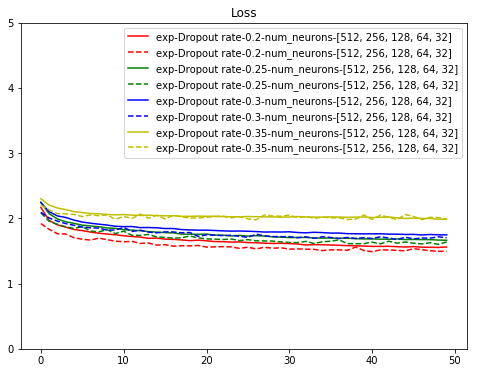

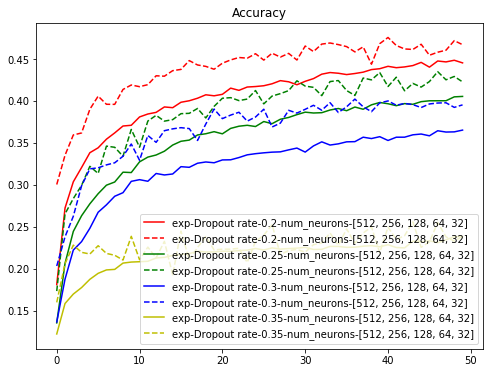

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "peru" , "orange"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()